## Analysis of a Car Sell Dataset Part 2

There are two goals in the second analysis task: (1), train linear regression models to predict the selling prices of cars; (2) assess the data ethics issues. There are *7* questions in this portfolio. 

The first goal involves a standard Data Science workflow: exploring data, building models, making predictions, and evaluating results. In this task, we will explore the impacts of feature selections and different sizes of training/testing data on the model performance. We will use another cleaned car_sells sub-dataset that **is different from** the one in “Analysis of a Car Sell Dataset” task 1. This goal covers Questions *1-6*. 

Question *7* is about data ethics issue.

In [425]:
your_name = "Van Trang Nguyen"
your_student_id = "47772174"

In [426]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_squared_error

import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline

### Q1: Import Cleaned Car Sell Dataset
The csv file named 'car_sells_clean_data.csv' is provided. You may need to use the Pandas method, i.e., `read_csv`, for reading it. After that, please print out its total length.

In [427]:
#Read the dataframe
car_sell = 'data/car_sells_clean_data.csv'
car_sell = pd.read_csv(car_sell)

In [428]:
#Print the length of the data
print(len(car_sell))

3657


### Q2: Explore the Dataset

* Use the methods, i.e., `head()` and `info()`, to have a rough picture about the data, e.g., how many columns, and the data types of each column.
* As our goal is to predict cars' selling prices given other columns, please get the correlations between year/km_driven/seller_type/fuel/owner and selling_price by using the `corr()` method.
* To get the correlations between different features, you may need to first convert the categorical features (i.e., seller_type and owner) into numerial values. For doing this, you may need to import `OrdinalEncoder` from `sklearn.preprocessing` (refer to the useful exmaples [here](https://pbpython.com/categorical-encoding.html))
* Please provide ___necessary explanations/analysis___ on the correlations, and figure out which are the ___most___ and ___least___ corrleated features regarding selling_price. Try to ___discuss___ how the correlation will affect the final prediction results, if we use these features to train a regression model for selling_price prediction. In what follows, we will conduct experiments to verify your hypothesis.

In [429]:
# Get the size of the data
car_sell.shape

(3657, 8)

In [430]:
#Display the data 
car_sell.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007.0,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007.0,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012.0,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017.0,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014.0,450000,141000,Diesel,Individual,Manual,Second Owner


In [431]:
#Display the column
car_sell.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

In [432]:
#Get information of the data 
car_sell.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3657 entries, 0 to 3656
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           3657 non-null   object 
 1   year           3657 non-null   float64
 2   selling_price  3657 non-null   int64  
 3   km_driven      3657 non-null   int64  
 4   fuel           3657 non-null   object 
 5   seller_type    3657 non-null   object 
 6   transmission   3657 non-null   object 
 7   owner          3657 non-null   object 
dtypes: float64(1), int64(2), object(5)
memory usage: 228.7+ KB


### The correlation between year and selling_price:

In [433]:
#Checking correlation between year and selling_price
car_sell[['year','selling_price']].corr()


,year,selling_price
year,1.000000,0.411103
selling_price,0.411103,1.000000


### The correlation between km_driven and selling_price:

In [434]:
#Checking correlation between km_driven and selling_price
car_sell[['km_driven','selling_price']].corr()


,km_driven,selling_price
km_driven,1.000000,-0.177203
selling_price,-0.177203,1.000000


In [435]:
#Import neccessary libraries
from sklearn.preprocessing import OrdinalEncoder

### The correlation between seller_type and selling_price:

In [436]:
#Convert seller_type into numerical
ord_enc = OrdinalEncoder()
car_sell["seller_type_code"] = ord_enc.fit_transform(car_sell[["seller_type"]])
#Get the correlation between seller_type and selling_price
car_sell[['seller_type_code','selling_price']].corr()

,seller_type_code,selling_price
seller_type_code,1.000000,-0.208637
selling_price,-0.208637,1.000000


### The correlation between fuel and selling_price:

In [437]:
#Convert fuel into numerical
car_sell["fuel_code"] = ord_enc.fit_transform(car_sell[["fuel"]])
#Get the correlation between seller_type and selling_price
car_sell[['fuel_code','selling_price']].corr()

,fuel_code,selling_price
fuel_code,1.000000,-0.277627
selling_price,-0.277627,1.000000


### The correlation between owner and selling_price:

In [438]:
#Convert owner into numerical
car_sell["owner_code"] = ord_enc.fit_transform(car_sell[["owner"]])
#Get the correlation between seller_type and selling_price
car_sell[['owner_code','selling_price']].corr()

,owner_code,selling_price
owner_code,1.000000,-0.205524
selling_price,-0.205524,1.000000


### Create heat map correlation between variables

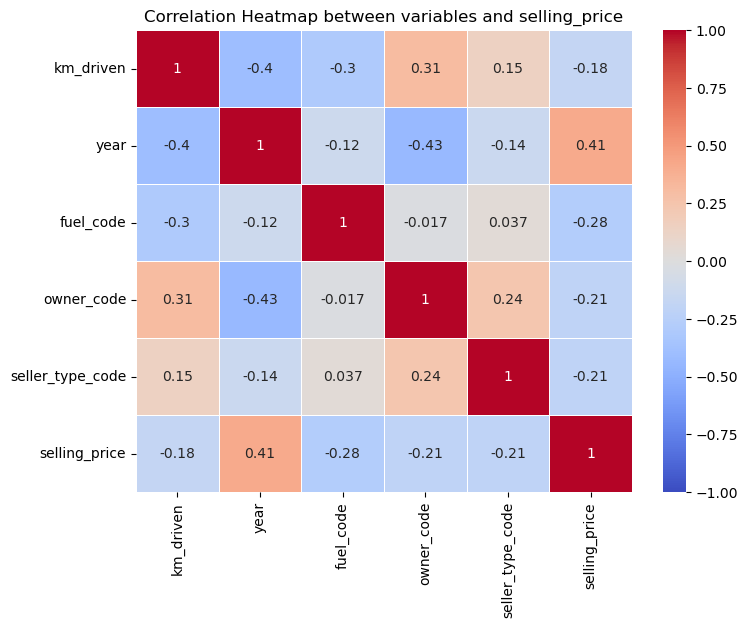

In [439]:
# Select only the relevant columns
corr_columns = ['km_driven', 'year', 'fuel_code', 'owner_code','seller_type_code','selling_price']

# Calculate the correlation matrix
corr_matrix = car_sell[corr_columns].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, vmin=-1, vmax=1)

# Title and labels
plt.title('Correlation Heatmap between variables and selling_price')
plt.show()

## Analysis 
### Highest Correlation
According to the correlation given before, the most correlated feature regarding selling_price is 0.411103. This result shows a strong positive correlation/relationship between year and selling price in comparison to other variables. 


### Lowest Correlation
The correlation coefficient of -0.177203 between km_driven and selling_price is the lowest compared to other features. It shows a weak correlation between km_driven and selling_price.

#### Overall
It can be witnessed that from the highest to the lowest correlation is year, fuel, seller_type, owner and km_driven in that order. The correlated relationship between selling_price and fuel, seller_type, owner, km_driven are negative meaning that a negative correlation between these features with selling_price. In contrast, the correlation between year and selling price is positive, leading to a positive relationship between them. Furthermore, the result demonstrates that the slope will be upward for year, while the opposite is true for others. It implies that the higher year is, the higher selling_price will be. In contrast, the lower other variables are, the higher selling price will be

### Q3: Split Training and Testing Data
* Machine learning models are trained to help make predictions for the future. Normally, we need to randomly split the dataset into training and testing sets, where we use the training set to train the model, and then leverage the well-trained model to make predictions on the testing set.
* To further investigate whether the size of the training/testing data affects the model performance, please randomly split the data into training and testing sets with different sizes:
    * Case 1: training data containing 10% of the entire data;
    * Case 2: training data containing 90% of the entire data.
* Print the shape of training and testing sets in the two cases.

### Create a copy of data set contains all of numerical variables


In [440]:
#Import necessary libraries
import copy
# Create a copy of the dataframe
car_sell_new = copy.copy(car_sell)

# Drop the original columns that is categorical
car_sell_new = car_sell_new.drop(["seller_type", "owner", "fuel"], axis = 1) 

# Rename the these "seller_type_code", "owner_code", "fuel_code" after tranforming
car_sell_new.rename(columns = {'seller_type_code':'seller_type', 'owner_code':'owner',"fuel_code":'fuel'}, inplace = True)
car_sell_new

,name,year,selling_price,km_driven,transmission,seller_type,fuel,owner
0,Maruti 800 AC,2007.0,60000,70000,Manual,1.0,1.0,0.0
1,Maruti Wagon R LXI Minor,2007.0,135000,50000,Manual,1.0,1.0,0.0
2,Hyundai Verna 1.6 SX,2012.0,600000,100000,Manual,1.0,0.0,0.0
3,Datsun RediGO T Option,2017.0,250000,46000,Manual,1.0,1.0,0.0
4,Honda Amaze VX i-DTEC,2014.0,450000,141000,Manual,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...
3652,Hyundai i20 Magna 1.4 CRDi (Diesel),2014.0,409999,80000,Manual,1.0,0.0,1.0
3653,Hyundai i20 Magna 1.4 CRDi,2014.0,409999,80000,Manual,1.0,0.0,1.0
3654,Maruti 800 AC BSIII,2009.0,110000,83000,Manual,1.0,1.0,1.0
3655,Hyundai Creta 1.6 CRDi SX Option,2016.0,865000,90000,Manual,1.0,0.0,0.0


## Case 1: training data containing 10% of the entire data

In [441]:
# The train_test_split function is used to train 10% of the data in the test set
train1, test1 = train_test_split(car_sell_new, train_size=0.1, random_state = 42) 
print("The shape of training: ", train1.shape)
print("The shape of testing: ", test1.shape)

The shape of training:  (365, 8)
The shape of testing:  (3292, 8)


In [442]:
# Display columns for training set:
train1.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'transmission',
       'seller_type', 'fuel', 'owner'],
      dtype='object')

In [443]:
# Display columns for testing set:
test1.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'transmission',
       'seller_type', 'fuel', 'owner'],
      dtype='object')

## Case 2: training data containing 90% of the entire data

In [444]:
# The train_test_split function is used to train 90% of the data in the test set
train2, test2 = train_test_split(car_sell_new, train_size=0.9, random_state = 42) 
print("The shape of training: ", train2.shape)
print("The shape of testing: ", test2.shape)

The shape of training:  (3291, 8)
The shape of testing:  (366, 8)


In [445]:
# Display columns for training set:
train2.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'transmission',
       'seller_type', 'fuel', 'owner'],
      dtype='object')

In [446]:
# Display columns for testing set:
test2.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'transmission',
       'seller_type', 'fuel', 'owner'],
      dtype='object')

### Q4: Train Linear Regression Models with Feature Selection under Cases 1 & 2
* When training a machine learning model for prediction, we may need to select the most important/correlated input features for more accurate results.
* To investigate whether feature selection affects the model performance, please select two most correlated features and two least correlated features regarding selling_price, respectively.
* Train four linear regression models by following the conditions:
    - (model-a) using the training/testing data in case 1 with two most correlated input features
    - (model-b) using the training/testing data in case 1 with two least correlated input features
    - (model-c) using the training/testing data in case 2 with two most correlated input features
    - (model-d) using the training/testing data in case 2 with two least correlated input features
* By doing this, we can verify the impacts of the size of traing/testing data on the model performance via comparing model-a and model-c (or model-b and model-d); meanwhile the impacts of feature selection can be validated via comparing model-a and model-b (or model-c and model-d).    

## Model a: using the training/testing data in case 1 with two most correlated input features

In [447]:
reg_a = linear_model.LinearRegression()
X_train_a = train1[['year','fuel']]
y_train_a = train1[['selling_price']]
X_test_a = test1[['year','fuel']]
y_test_a = test1[['selling_price']]

#Fit the model
reg_a.fit(X_train_a,y_train_a)
# Print the model
print( "y = x *", reg_a.coef_, "+" , reg_a.intercept_)

y = x * [[  64417.51267191 -277034.06806034]] + [-1.29019979e+08]


## Model b: using the training/testing data in case 1 with two least correlated input features

In [448]:
reg_b = linear_model.LinearRegression()
X_train_b = train1[['owner','km_driven']]
y_train_b = train1[['selling_price']]
X_test_b = test1[['owner','km_driven']]
y_test_b = test1[['selling_price']]

#Fit the model
reg_b.fit(X_train_b,y_train_b)
# Print the model
print( "y = x *", reg_b.coef_, "+" , reg_b.intercept_)

y = x * [[-1.13002634e+05 -2.99854745e+00]] + [772525.89193473]


## Model c: using the training/testing data in case 2 with two most correlated input features

In [449]:
reg_c = linear_model.LinearRegression()
X_train_c = train2[['year','fuel']]
y_train_c = train2[['selling_price']]
X_test_c = test2[['year','fuel']]
y_test_c = test2[['selling_price']]
#Fit the model
reg_c.fit(X_train_c,y_train_c)
# Print the model
print( "y = x *", reg_c.coef_, "+" , reg_c.intercept_)

y = x * [[  52080.97486204 -257175.87682036]] + [-1.04222057e+08]


## Model d: using the training/testing data in case 2 with two least correlated input features

In [450]:
reg_d = linear_model.LinearRegression()
X_train_d = train2[['owner','km_driven']]
y_train_d = train2[['selling_price']]
X_test_d = test2[['owner','km_driven']]
y_test_d = test2[['selling_price']]

#Fit the model
reg_d.fit(X_train_d,y_train_d)
# Print the model
print( "y = x *", reg_d.coef_, "+" , reg_d.intercept_)

y = x * [[-1.53274884e+05 -1.51020610e+00]] + [660703.3968196]


### Q5: Evaluate Models
* Evaluate the performance of the four models with two metrics, including MSE and Root MSE
* Print the results of the four models regarding the two metrics

In [451]:
# Evaluate model a:
# Predict the value
predicted_a=reg_a.predict(X_test_a)
# Get the metrics:
mse_a = mean_squared_error(y_test_a, predicted_a)
r2_a = r2_score(y_test_a, predicted_a)
print("MSE:", mse_a)
print("Root MSE:", np.sqrt(mse_a))
print("R^2:", r2_a)

MSE: 240873725575.09454
Root MSE: 490788.8808592698
R^2: 0.2043619078459994


In [452]:
# Evaluate model b:
# Predict the value
predicted_b=reg_b.predict(X_test_b)
# Get the metrics:
mse_b = mean_squared_error(y_test_b, predicted_b)
r2_b = r2_score(y_test_b, predicted_b)
print("MSE:", mse_b)
print("Root MSE:", np.sqrt(mse_b))
print("R^2:", r2_b)

MSE: 292715789614.6963
Root MSE: 541032.152108076
R^2: 0.033120645116682


In [453]:
# Evaluate model c:
# Predict the value:
predicted_c=reg_c.predict(X_test_c)
# Get the metrics:
mse_c = mean_squared_error(y_test_c, predicted_c)
r2_c = r2_score(y_test_c, predicted_c)
print("MSE:", mse_c)
print("Root MSE:", np.sqrt(mse_c))
print("R^2:", r2_c)

MSE: 141350876932.57806
Root MSE: 375966.59018133255
R^2: 0.3197367717290548


In [454]:
# Evaluate model d:
# Predict the value
predicted_d=reg_d.predict(X_test_d)
# Get the metrics:
mse_d = mean_squared_error(y_test_d, predicted_d)
r2_d = r2_score(y_test_d, predicted_d)
print("MSE:", mse_d)
print("Root MSE:", np.sqrt(mse_d))
print("R^2:", r2_d)

MSE: 195254216561.59503
Root MSE: 441875.79313829244
R^2: 0.0603223229024622


### Q6: Visualize, Compare and Analyze the Results
* Visulize the results, and perform ___insightful analysis___ on the obtained results. For better visualization, you may need to carefully set the scale for the y-axis.
* Normally, the model trained with most correlated features and more training data will get better results. Do you obtain the similar observations? If not, please ___explain the possible reasons___.

## Visualise

## Compare MSE between 4 models

(100000000000.0, 400000000000.0)

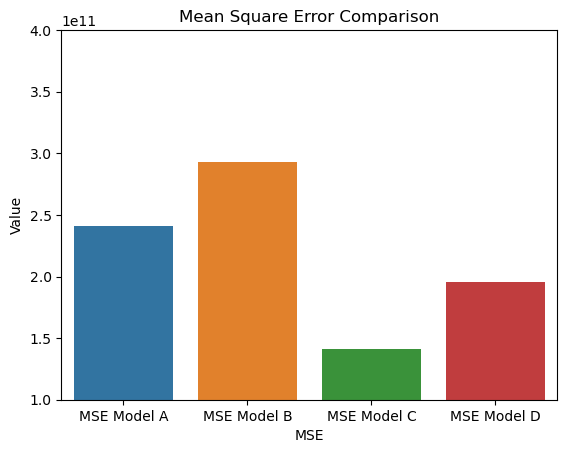

In [455]:
# Plot the bar chart to compare mean square error between four models
sns.barplot(x = ['MSE Model A', 'MSE Model B','MSE Model C', 'MSE Model D'], y = [mse_a, mse_b, mse_c, mse_d]).set(title = "Mean Square Error Comparison", ylabel = 'Value', xlabel = 'MSE')
# Set the scale for the y-axis from 100000000000 to 400000000000 as the mse of four models are within this range
plt.ylim(100000000000,400000000000)

## Analyze  
- From the graph above, it can be witnessed that model C is the best model for prediction as it has lowest mean squared error. This is the training data of model C accounts for a significant amount of the data set (90% of the data set) and is trained with the most two correlated features. 

- Moreover, model A is potentially an acceptable model for prediction, given that it has a considerably low MSE. Although model A was trained with a small amount of data set (only 10%), this still performs well in terms of prediction, because model A was trained with two most correlated features.

- Model B is the worst model for prediction as its MSE dominated others to account for the highest, the reason might be it has a small amount of training data in the test set  (10% of the dataset) and is trained with the least two correlated features. 

- Model D is better than model B, this is because it has more training data (model D trains 90% of the data set). Though trained with two least correlated features, its MSE is still low enough to be considered as a good model for prediction.

## Compare 
- In case 1 (10% of the data set), model A and model B seems not to perform good prediction in comparison to model C and model D.
- In case 2 (90% of the data set), the performance of model C and model D is much better.
- Regardless of the training data amount, evaluating the MSE helps us to know that model A is more efficient than model B and model C is more effective than model D.

## Summary
- Based on visualisation, in conclusion, the larger the training data in the test set and the more correlated features models train, the lower mean square error and the better the model for prediction.
- Additionally, the result shows that using the most correlated features is more effective for prediction compared with the least correlated variables.

## Compare R Square of 4 models

(0.0, 0.4)

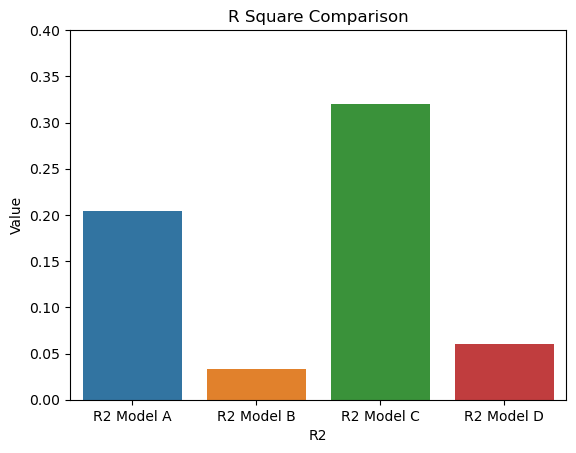

In [456]:
# Plot the bar chart to compare r square score between four models
sns.barplot(x = ['R2 Model A', 'R2 Model B','R2 Model C', 'R2 Model D'], y = [r2_a, r2_b, r2_c, r2_d]).set(title = "R Square Comparison", ylabel = 'Value', xlabel = 'R2')
# Set the scale for the y-axis from 0 to 0.25 as the r-squared of four models are within this range
plt.ylim(0,0.4)

#### Analysis 
- Model C is the best model for prediction according to R Squared result since it has highest absolute value of R-square and its trains data containing 90% of the entire data which assists the model fit better. 

- Model B and D seems to fit data ineffectively based on their significantly low R-square compared to others, this is because they are being trained with two least correlated features.

## Compare root MSE between 4 models:

(0.0, 600000.0)

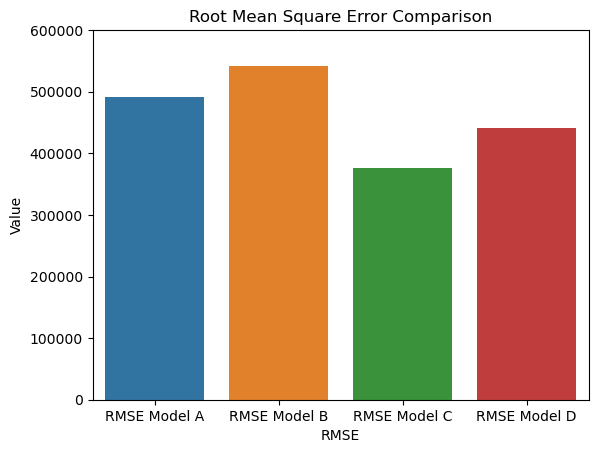

In [459]:
# Plot the bar chart to compare mean square error between four models
sns.barplot(x = ['RMSE Model A', 'RMSE Model B','RMSE Model C', 'RMSE Model D'], y = [np.sqrt(mse_a), np.sqrt(mse_b), np.sqrt(mse_c), np.sqrt(mse_d)]).set(title = "Root Mean Square Error Comparison", ylabel = 'Value', xlabel = 'RMSE')
# Set the scale for the y-axis from 100000000000 to 400000000000 as the mse of four models are within this range
plt.ylim(0,600000)

#### Analyze 
- From the graph, we can conclude that model C is the best model among all, due to its lowest root mean square error. That is because model C was trained with a huge amount of the data set (90% of the data set) and with two most correlated features.

- Moreover, it can be seen that Model D is also a good model for prediction even though it was trained with two least correlated features. That is because it is being trained with a large amount of the data set (90% of the data set), therefore, model D still performs considerably good predictive. 

- Model B is the worst model for prediction because it has a small training data in the test set (10% of the dataset) and is trained with the least two correlated features along with the highest root mean square error, given that its root mean square error was largest. 

- Model A is better than model B by training with two most correlated features. In model D, two most correlated features assist a small amount of data to minimize root mean square error.


#### Compare 
- In case 1 (10% of entire data), both model A and B is not suitable for prediction, compared to model C and model D in the order.
- In case 2 (90% of the entire data), model C and D had lower RMSE demonstrates a significant improvement.
- Regardless of the training data amount in the test, the RMSE graph records that model A is more efficient than model B and model C is more effective than model D.

#### Summary
- According to the graphs and analysis, we conclude similarly that the larger the training data in the test set and the more models trained with the most correlated features, the better the model for prediction and lessening root mean square error.
- Moreover, the result indicates that the difference between these models is inconsiderably small regarding RMSE. It might be influenced by other factors; thus, other factors should be taken into consideration in deciding a model for predictive performance.

### Q7: Data Science Ethics
*Please read the following examples [Click here to read the example_1.](https://www.vox.com/covid-19-coronavirus-us-response-trump/2020/5/18/21262265/georgia-covid-19-cases-declining-reopening) [Click here to read the example_2.](https://viborc.com/ethics-and-ethical-data-visualization-a-complete-guide/)

*Then view the picture ![My Image](figure_portfolio2.png "This is my image")
Please compose an analysis of 100-200 words that evaluates potential ethical concerns associated with the infographic, detailing the reasons behind these issues.


## 1) Misleading Representation: 
The two above tables are sorted differently because the first table is sorted by the number of total medals, while the other is sorted by the number of gold medals only, thereby causing confusion for the audience since they may not know which criteria should be considered more important for determining the rankings and the winner. This can lead to a problem if viewers think that the order reflecs the general Olympic performance. 
## 2) Lack of Context: 
Because the infographic doesn't give information about how the data is sorted, this can lead to misunderstanding and confusion among viewers. For example, one might think that a country with more total medals performed succesfully in the Olympics, while another might think that a country with more gold medals is better. To avoid this confusion, the picture should provide more context explaining the meaning of both the sorting method and how it relates to a country's achievement.